# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Rezaldi
- Email: rezaldi30082003@students.amikom.ac.id
- Id Dicoding: rezaldi_20113717

## Menentukan Pertanyaan Bisnis

- Apa pengaruh suhu (temp) terhadap pola penyewaan sepeda?
- Bagaimana pola penggunaan sepeda berdasarkan musim (season) dan cuaca (weathersit)? 

## Menyaipkan semua library yang dibuthkan

In [32]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [33]:
#memuat tabel day
day_df = pd.read_csv("data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
#memuat tabel hour
hour_df = pd.read_csv("data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### asssessing data day 

In [35]:
day_df.info()
day_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

untuk column dteday sebaiknya menggunakan tipe data 'datetime' 

In [36]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### assessing data hour

In [37]:
hour_df.info()
hour_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

ganti tipe data column dteday dari 'object' ke 'datetime'

In [38]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### cleaning data day

In [39]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [40]:
# menampilkan hasil perubahan tipe data
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


dari hasil diatas column dteday tipe datanya sudah berhasil dirubah

#### cleaning data hour

In [41]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [42]:
# Tampilkan info dataset setelah perubahan
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


tipe data dteday telah diubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [43]:
#  summary statistics
temp_summary = day_df['temp'].describe()
cnt_summary = day_df['cnt'].describe()

print("Temperature (temp):")
print(temp_summary)

print("\nBike Rentals (cnt):")
print(cnt_summary)

Temperature (temp):
count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

Bike Rentals (cnt):
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


In [44]:
# korelasi temp dan cnt
correlation_temp_cnt = day_df['temp'].corr(day_df['cnt'])
print("korelasi temp dan cnt:", correlation_temp_cnt)

korelasi temp dan cnt: 0.6274940090334918


In [45]:
# Definisikan batas kategori suhu
bins = [0, 0.3, 0.6, 0.9, 1.0]
labels = ['Very Cold', 'Cold', 'Moderate', 'Hot']

# Tambahkan kolom baru dengan kategori suhu
day_df['temp_category'] = pd.cut(day_df['temp'], bins=bins, labels=labels)

# Hitung rata-rata jumlah sewaan sepeda (cnt) dalam setiap kategori suhu
avg_cnt_by_temp_category = day_df.groupby('temp_category')['cnt'].mean()
print("Average Bike Rentals (cnt) per Temperature Category:")
print(avg_cnt_by_temp_category)


Average Bike Rentals (cnt) per Temperature Category:
temp_category
Very Cold    2381.214815
Cold         4488.178363
Moderate     5654.559055
Hot                  NaN
Name: cnt, dtype: float64


In [46]:
# summary statistics
season_summary = day_df['season'].describe()
weathersit_summary = day_df['weathersit'].describe()

print("Season (season):")
print(season_summary)

print("\nWeather Situation (weathersit):")
print(weathersit_summary)

cnt_by_season_weather = day_df.groupby(['season', 'weathersit'])['cnt'].mean()
print("\nrata-rata rental sepeda (cnt) per Season dan weathersit:")
print(cnt_by_season_weather)


Season (season):
count    731.000000
mean       2.496580
std        1.110807
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

Weather Situation (weathersit):
count    731.000000
mean       1.395349
std        0.544894
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

rata-rata rental sepeda (cnt) per Season dan weathersit:
season  weathersit
1       1             2811.135135
        2             2357.166667
        3              934.750000
2       1             5548.548673
        2             4236.705882
        3             1169.000000
3       1             5878.257353
        2             5222.479167
        3             2751.750000
4       1             5043.563107
        2             4654.000000
        3             1961.600000
Name: cnt, dtype: float64


In [47]:
crosstab_season_weather = pd.crosstab(day_df['season'], day_df['weathersit'], values=day_df['cnt'], aggfunc='mean')
print("\nCrosstab: rata-rata rental sepeda (cnt) per Season dan weathersit:")
print(crosstab_season_weather)


Crosstab: rata-rata rental sepeda (cnt) per Season dan weathersit:
weathersit            1            2        3
season                                       
1           2811.135135  2357.166667   934.75
2           5548.548673  4236.705882  1169.00
3           5878.257353  5222.479167  2751.75
4           5043.563107  4654.000000  1961.60


In [48]:
# Buat fitur baru 'season_weathersit'
day_df['season_weathersit'] = day_df['season'].astype(str) + '_' + day_df['weathersit'].astype(str)

# Hitung rata-rata jumlah sewaan sepeda (cnt) berdasarkan kombinasi season dan weathersit
avg_cnt_by_season_weathersit = day_df.groupby('season_weathersit')['cnt'].mean()
print("rata-rata rental sepeda (cnt) per Season and kombinasi weathersit:")
print(avg_cnt_by_season_weathersit)


rata-rata rental sepeda (cnt) per Season and kombinasi weathersit:
season_weathersit
1_1    2811.135135
1_2    2357.166667
1_3     934.750000
2_1    5548.548673
2_2    4236.705882
2_3    1169.000000
3_1    5878.257353
3_2    5222.479167
3_3    2751.750000
4_1    5043.563107
4_2    4654.000000
4_3    1961.600000
Name: cnt, dtype: float64


### Explore data hour_df

In [49]:
#  summary statistics
temp_summary = hour_df['temp'].describe()
cnt_summary = hour_df['cnt'].describe()

print("Temperature (temp):")
print(temp_summary)

print("\nBike Rentals (cnt):")
print(cnt_summary)

Temperature (temp):
count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

Bike Rentals (cnt):
count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64


In [50]:
# korelasi temp dan cnt
correlation_temp_cnt = hour_df['temp'].corr(hour_df['cnt'])
print("korelasi temp dan cnt:", correlation_temp_cnt)

korelasi temp dan cnt: 0.4047722757786589


In [51]:
# Definisikan batas kategori suhu
bins = [0, 0.3, 0.6, 0.9, 1.0]
labels = ['Very Cold', 'Cold', 'Moderate', 'Hot']

# Tambahkan kolom baru dengan kategori suhu
hour_df['temp_category'] = pd.cut(hour_df['temp'], bins=bins, labels=labels)

# Hitung rata-rata jumlah sewaan sepeda (cnt) dalam setiap kategori suhu
avg_cnt_by_temp_category = hour_df.groupby('temp_category')['cnt'].mean()
print("Average Bike Rentals (cnt) per Temperature Category:")
print(avg_cnt_by_temp_category)


Average Bike Rentals (cnt) per Temperature Category:
temp_category
Very Cold     84.378486
Cold         177.897758
Moderate     268.311250
Hot          292.809524
Name: cnt, dtype: float64


In [52]:
# summary statistics
season_summary = hour_df['season'].describe()
weathersit_summary = hour_df['weathersit'].describe()

print("Season (season):")
print(season_summary)

print("\nWeather Situation (weathersit):")
print(weathersit_summary)

cnt_by_season_weather = hour_df.groupby(['season', 'weathersit'])['cnt'].mean()
print("\nrata-rata rental sepeda (cnt) per Season dan weathersit:")
print(cnt_by_season_weather)


Season (season):
count    17379.000000
mean         2.501640
std          1.106918
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: season, dtype: float64

Weather Situation (weathersit):
count    17379.000000
mean         1.425283
std          0.639357
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: weathersit, dtype: float64

rata-rata rental sepeda (cnt) per Season dan weathersit:
season  weathersit
1       1             122.055535
        2             103.074689
        3              58.650407
        4              74.333333
2       1             232.410983
        2             181.261364
        3             115.179803
3       1             244.494207
        2             224.848997
        3             171.955390
4       1             209.463779
        2             201.483974
        3             116.453333
Name: cnt, dtype: float64


In [53]:
crosstab_season_weather = pd.crosstab(hour_df['season'], hour_df['weathersit'], values=hour_df['cnt'], aggfunc='mean')
print("\nCrosstab: rata-rata rental sepeda (cnt) per Season dan weathersit:")
print(crosstab_season_weather)


Crosstab: rata-rata rental sepeda (cnt) per Season dan weathersit:
weathersit           1           2           3          4
season                                                   
1           122.055535  103.074689   58.650407  74.333333
2           232.410983  181.261364  115.179803        NaN
3           244.494207  224.848997  171.955390        NaN
4           209.463779  201.483974  116.453333        NaN


In [54]:
# Buat fitur baru 'season_weathersit'
hour_df['season_weathersit'] = hour_df['season'].astype(str) + '_' + hour_df['weathersit'].astype(str)

# Hitung rata-rata jumlah sewaan sepeda (cnt) berdasarkan kombinasi season dan weathersit
avg_cnt_by_season_weathersit = hour_df.groupby('season_weathersit')['cnt'].mean()
print("rata-rata rental sepeda (cnt) per Season and kombinasi weathersit:")
print(avg_cnt_by_season_weathersit)


rata-rata rental sepeda (cnt) per Season and kombinasi weathersit:
season_weathersit
1_1    122.055535
1_2    103.074689
1_3     58.650407
1_4     74.333333
2_1    232.410983
2_2    181.261364
2_3    115.179803
3_1    244.494207
3_2    224.848997
3_3    171.955390
4_1    209.463779
4_2    201.483974
4_3    116.453333
Name: cnt, dtype: float64


## Visualization & Explanatory Analysis

### Apa pengaruh suhu (temp) terhadap pola penyewaan sepeda?

#### data_day

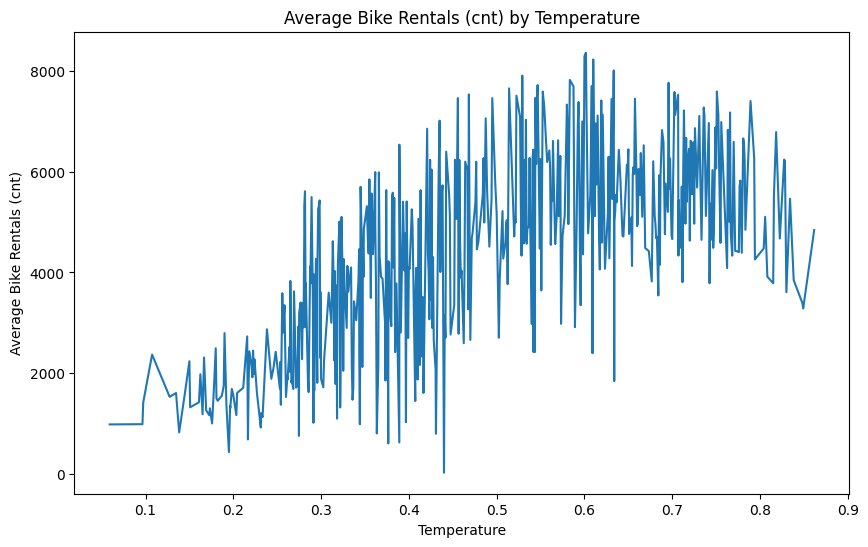

In [55]:
# line plot
avg_cnt_by_temp = day_df.groupby('temp')['cnt'].mean()

plt.figure(figsize=(10, 6))
avg_cnt_by_temp.plot(kind='line')
plt.title("Average Bike Rentals (cnt) by Temperature")
plt.xlabel("Temperature")
plt.ylabel("Average Bike Rentals (cnt)")
plt.show()

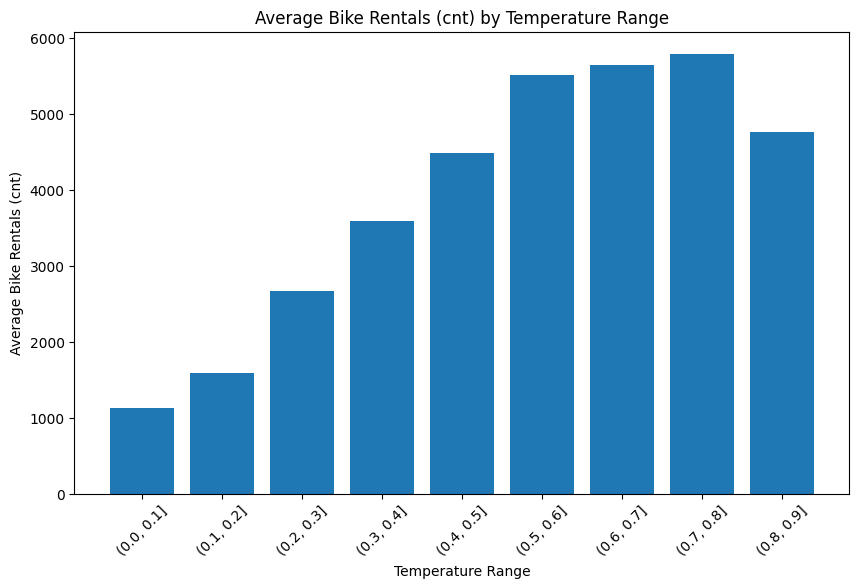

In [56]:
#Bar Plot by Temperature and Bike Rentals (cnt)
plt.figure(figsize=(10, 6))
bins = np.arange(0, 1.1, 0.1)
day_df['temp_range'] = pd.cut(day_df['temp'], bins)
avg_cnt_by_temp_range = day_df.groupby('temp_range')['cnt'].mean()

plt.bar(avg_cnt_by_temp_range.index.astype(str), avg_cnt_by_temp_range.values)
plt.title("Average Bike Rentals (cnt) by Temperature Range")
plt.xlabel("Temperature Range")
plt.ylabel("Average Bike Rentals (cnt)")
plt.xticks(rotation=45)
plt.show()


#### hour_df

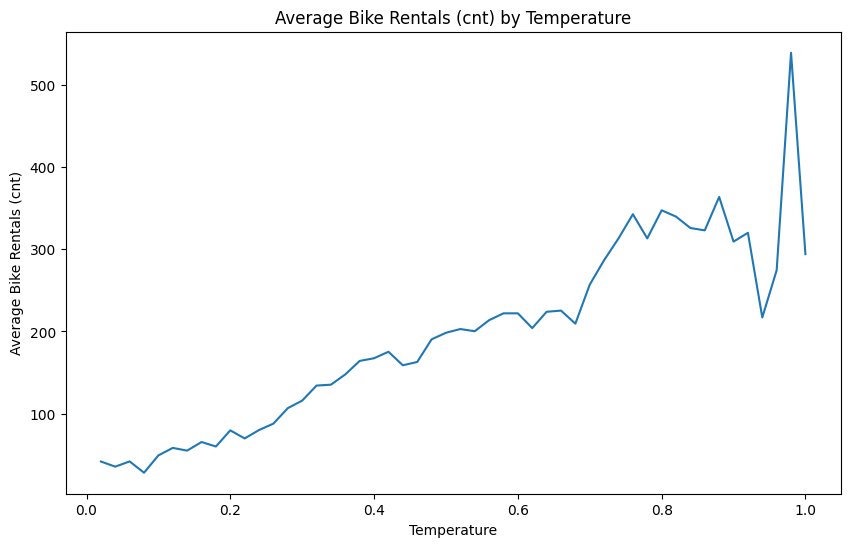

In [57]:
# line plot
avg_cnt_by_temp = hour_df.groupby('temp')['cnt'].mean()

plt.figure(figsize=(10, 6))
avg_cnt_by_temp.plot(kind='line')
plt.title("Average Bike Rentals (cnt) by Temperature")
plt.xlabel("Temperature")
plt.ylabel("Average Bike Rentals (cnt)")
plt.show()

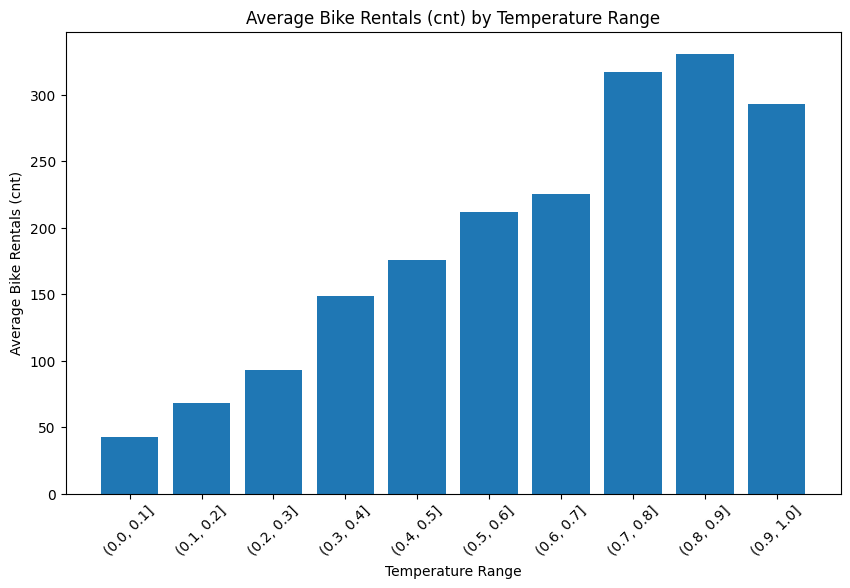

In [58]:
# Bar Plot by Temperature and Bike Rentals (cnt)
plt.figure(figsize=(10, 6))
bins = np.arange(0, 1.1, 0.1)
hour_df['temp_range'] = pd.cut(hour_df['temp'], bins)
avg_cnt_by_temp_range = hour_df.groupby('temp_range')['cnt'].mean()

plt.bar(avg_cnt_by_temp_range.index.astype(str), avg_cnt_by_temp_range.values)
plt.title("Average Bike Rentals (cnt) by Temperature Range")
plt.xlabel("Temperature Range")
plt.ylabel("Average Bike Rentals (cnt)")
plt.xticks(rotation=45)
plt.show()


### Bagaimana pola penggunaan sepeda berdasarkan musim (season) dan cuaca (weathersit)?  

#### day_df

<Figure size 1000x600 with 0 Axes>

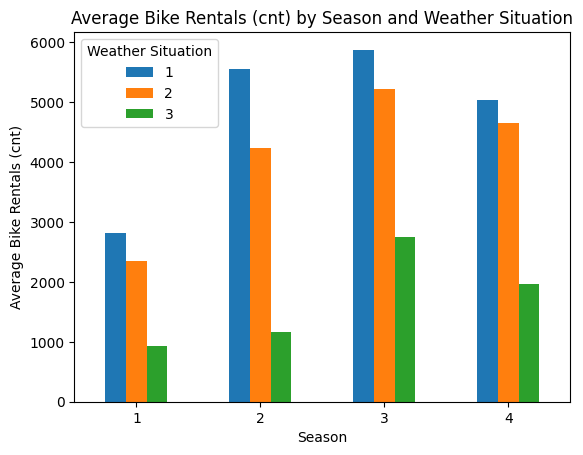

In [59]:
# bar plot
avg_cnt_by_season_weathersit = day_df.groupby(['season', 'weathersit'])['cnt'].mean().unstack()

plt.figure(figsize=(10, 6))
avg_cnt_by_season_weathersit.plot(kind='bar')
plt.title("Average Bike Rentals (cnt) by Season and Weather Situation")
plt.xlabel("Season")
plt.ylabel("Average Bike Rentals (cnt)")
plt.xticks(rotation=0)
plt.legend(title="Weather Situation")
plt.show()


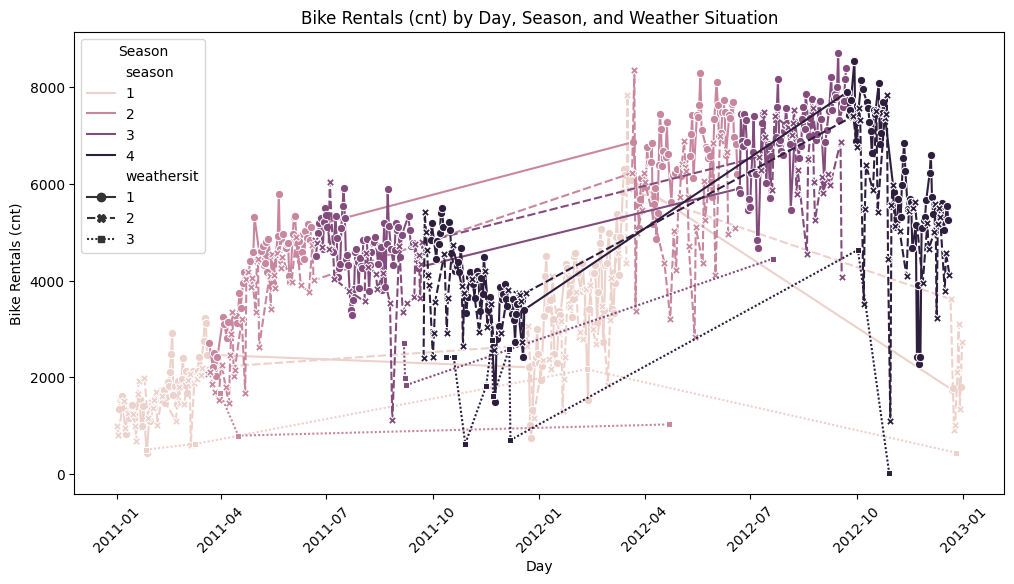

In [60]:
# Membuat line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_df, x='dteday', y='cnt', hue='season', style='weathersit', markers=True)
plt.title("Bike Rentals (cnt) by Day, Season, and Weather Situation")
plt.xlabel("Day")
plt.ylabel("Bike Rentals (cnt)")
plt.legend(title="Season")
plt.xticks(rotation=45)
plt.show()

#### hour_df

<Figure size 1000x600 with 0 Axes>

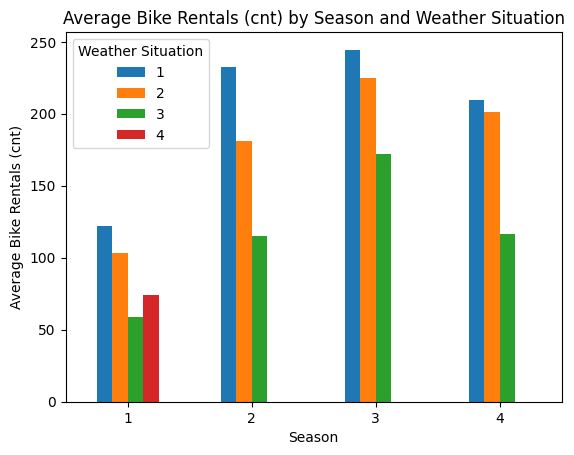

In [61]:
# bar plot
avg_cnt_by_season_weathersit = hour_df.groupby(['season', 'weathersit'])['cnt'].mean().unstack()

plt.figure(figsize=(10, 6))
avg_cnt_by_season_weathersit.plot(kind='bar')
plt.title("Average Bike Rentals (cnt) by Season and Weather Situation")
plt.xlabel("Season")
plt.ylabel("Average Bike Rentals (cnt)")
plt.xticks(rotation=0)
plt.legend(title="Weather Situation")
plt.show()


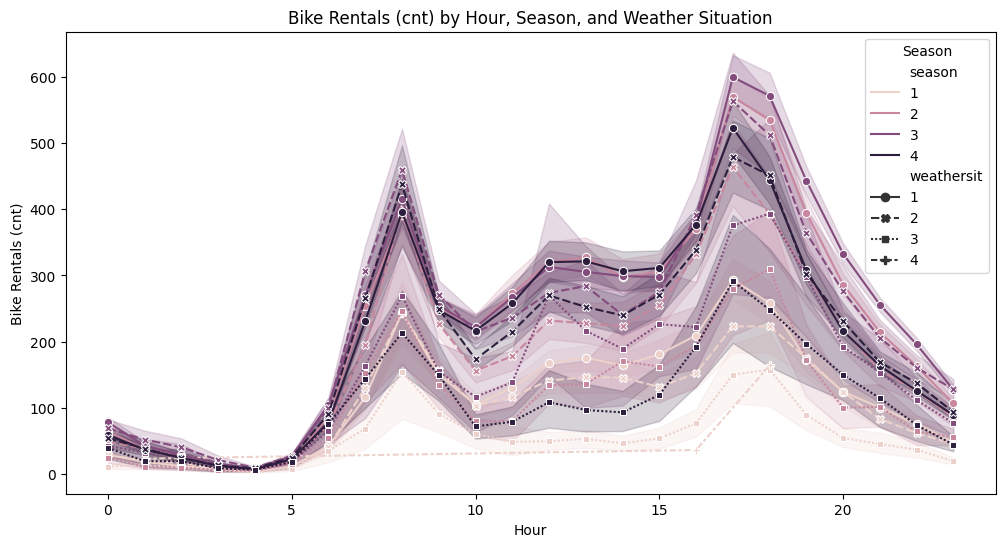

In [62]:
# Membuat line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='hr', y='cnt', hue='season', style='weathersit', markers=True)
plt.title("Bike Rentals (cnt) by Hour, Season, and Weather Situation")
plt.xlabel("Hour")
plt.ylabel("Bike Rentals (cnt)")
plt.legend(title="Season")
plt.show()

## Conclusion

- Apa pengaruh suhu (temp) terhadap pola penyewaan sepeda?



berdasarkan analisis yang telah dilakukan temperatur sangat menpengaruhi rental sepeda bisa di lihat di visualisasi data diatas membuktikan semakin tinggi temp semakin naik jumlah yang rental sepeda tetapi menurun di temperatur diatas 0.8 - 1

- Bagaimana pola penggunaan sepeda berdasarkan musim (season) dan cuaca (weathersit)?

berdasarkan analisis yang telah dilakukan musim dan cuaca mempengaruhi jumlah rental sepeda. jumlah rental sepeda meningkat di musim gugur dan saat cuaca Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian. Dan terendah saat musim semi dan cuaca Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan